# Visualizer 👁‍🗨
## You can choose the color in <code>style/asahikawa.py</code> 

In [1]:
# Set completion alarm 
from IPython import get_ipython
from tools.beeper import Beeper

beeper = Beeper(0.8, url="tools/sound/omnitool.mp3", click_url="")
ipython = get_ipython()

# Unregister existing pre_execute and post_execute event handlers if they exist
try:
    ipython.events.unregister('pre_execute', beeper.pre_execute)
except ValueError:
    # The handler was not registered, so no action needed
    pass

try:
    ipython.events.unregister('post_execute', beeper.post_execute)
except ValueError:
    # The handler was not registered, so no action needed
    pass

# Register the new event handlers
ipython.events.register('pre_execute', beeper.pre_execute)
ipython.events.register('post_execute', beeper.post_execute)

In [2]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2
from visualizer import * 
import pandas as pd
import numpy as np 

## Examples 1: plot 

In [3]:
df = pd.read_csv("new_data/query.csv")
import time 
df

,Query budget,BLEU,METEOR,ROUGE-1
0,$10$,25.14,19.98,30.28
1,$10^2$,24.92,19.77,30.44
2,$10^3$,24.42,19.64,30.18
3,$10^4$,23.72,19.15,29.47
4,$5 \cdot 10^4$,18.91,29.15,NaN
5,$10^5$,18.74,28.99,NaN


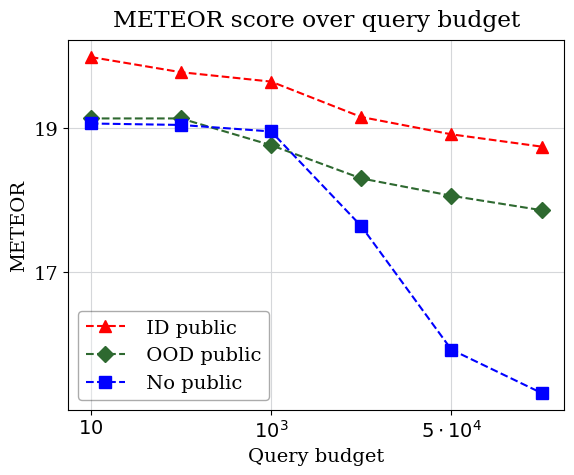

In [13]:
visualizer = Visualizer("new_data/query_METEOR.csv", xaxis=True, CI=False, style={"plot": "plot2"})
visualizer.plot(xlabel="Query budget", ylabel="METEOR", marker="enum", filesave="figure/query_METEOR.png", linestyle="--", title="METEOR score over query budget", legend=True, markersize=8, y_resolution=2, grid=True)

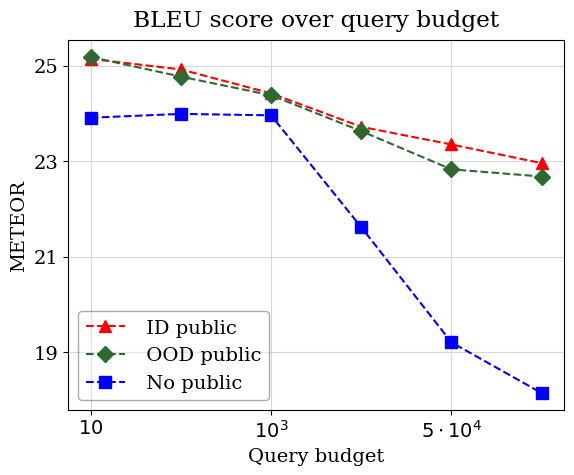

In [15]:
visualizer = Visualizer("new_data/query_BLEU.csv", xaxis=True, CI=False, style={"plot": "plot2"})
visualizer.plot(xlabel="Query budget", ylabel="METEOR", marker="enum", filesave="figure/query_BLEU.png", linestyle="--", title="BLEU score over query budget", legend=True, markersize=8, y_resolution=2, grid=True)

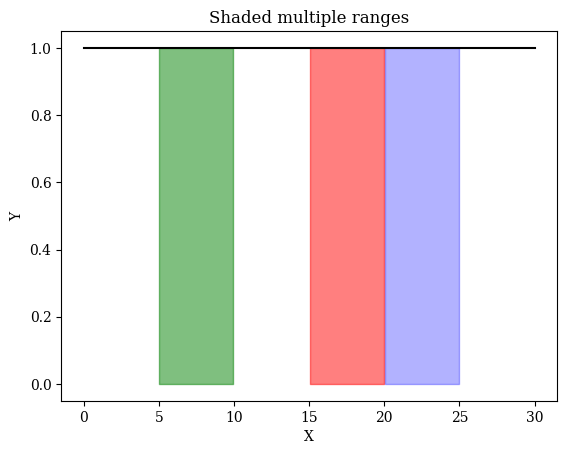

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# x값의 범위
x = np.linspace(0, 30, 300)
y = np.ones_like(x)  # y 값은 모두 1로 설정 (y=1 위치에서 범위 표시)

# 선 그래프 (구간을 표시하기 위한 라인)
plt.plot(x, y, color='black')

# 첫 번째 구간 색칠 (5, 10 사이)
plt.fill_between(x, y, where=(x >= 5) & (x <= 10), color='green', alpha=0.5)

# 두 번째 구간 색칠 (15, 20 사이)
plt.fill_between(x, y, where=(x >= 15) & (x <= 20), color='red', alpha=0.5)

# 세 번째 구간 색칠 (20, 25 사이)
plt.fill_between(x, y, where=(x >= 20) & (x <= 25), color='blue', alpha=0.3)

# 제목과 축 레이블 설정
plt.title('Shaded multiple ranges')
plt.xlabel('X')
plt.ylabel('Y')

# 그래프 보여주기
plt.show()

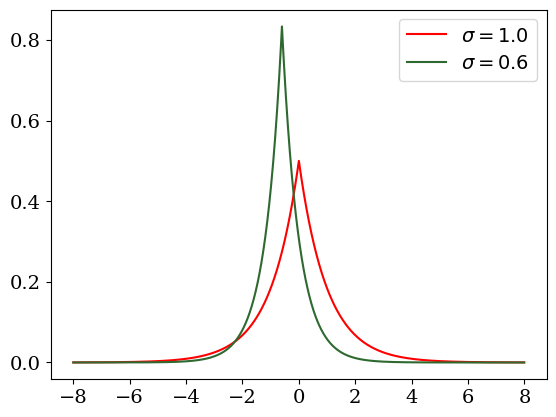

In [6]:
# Plot directly 
loc, scale = 0., 1.
loc2, scale2 = -0.6, 0.6 
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
pdf2 = np.exp(-abs(x-loc2)/scale2)/(2.*scale2)
label = ["$\sigma=1$"]
with plt.style.context(asahikawa["plot2"]):
    plt.plot(x, pdf, label="$\sigma=1.0$")
    plt.plot(x, pdf2, label="$\sigma=0.6$")
    plt.legend()
    plt.savefig("figure/1251.png", dpi=300)
time.sleep(1)

## Example 2: plot with two-y scale 

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'

In [8]:
df = pd.read_csv("data/gdp.csv")
#df

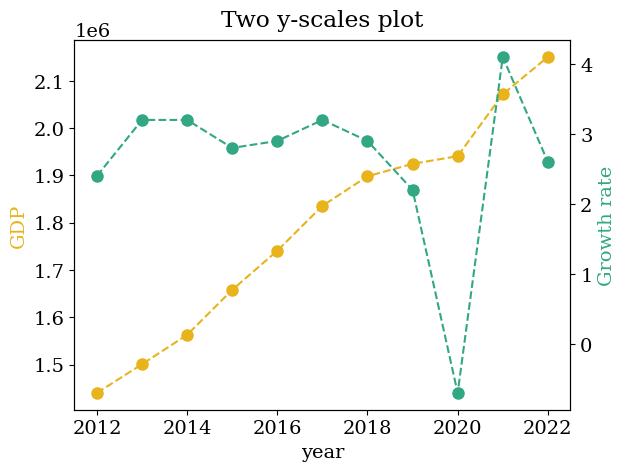

In [9]:
visualizer = Visualizer("data/gdp.csv", xaxis=True, CI=False, label_axis='col')
time.sleep(1)
visualizer.two_yscale_plot(xlabel="year", marker="o", linestyle="--", grid=False, title="Two y-scales plot", markersize=8, filesave="figure/4214.png")

# Histogram 

In [12]:
d = pd.read_csv("data/gaussian.csv")
d

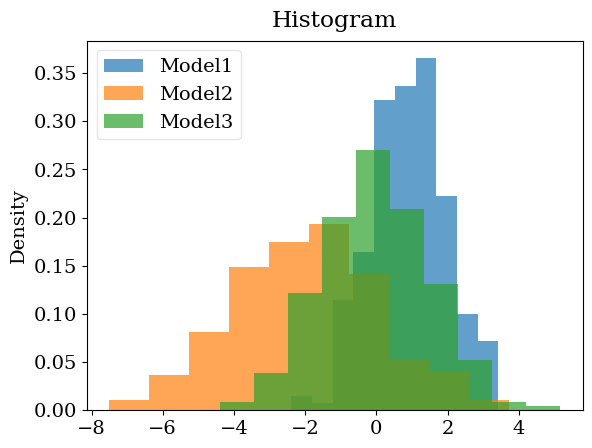

In [15]:
visualizer = Visualizer("data/gaussian.csv")
visualizer.histogram(density=True, ylabel="Density", title="Histogram", filesave="figure/fdaf.png")

In [24]:
import numpy as np 
arr = 0.1+ 0.05*np.random.randn(100,1)
arr2 = 0.3 + 0.1 * np.random.randn(100,1)
data = np.concatenate([arr,arr2], axis=1)
Visualizer.array2csv(data, ["UnderQ", "OverQ"], "data/query.csv")

# Multiple Bar Chart 
## csv 파일의 첫 번째 column은 카테고리를 나타네고 헤더는 모델을 나타냄  

In [2]:
pd.read_csv("data/llama3_halu.csv")

,Method,Entropy,Semantic,Self-CheckGPT,Prompt-based
0,In-context,0.039,0.032,0.027,0.025
1,Reward model,0.041,0.052,0.036,0.038


In [3]:
pd.read_csv("data/mbar_CI.csv") # file for confidence interval values 

,GPT-neo 1.3B,GPT-neo 2.7B,OPT 1.3B,OPT 13B,GPT-3 davinci 002
0,0.030,0.040,0.050,0.040,0.051
1,0.043,0.041,0.056,0.038,0.052
2,0.041,0.029,0.038,0.064,0.012
3,0.012,0.023,0.014,0.052,0.025


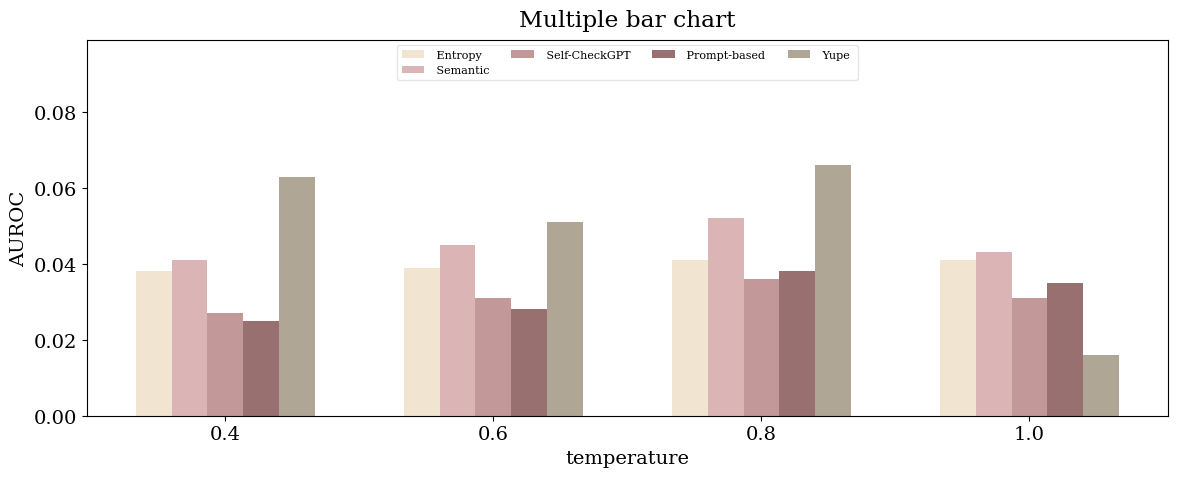

In [7]:
visualizer = Visualizer("data/temp.csv", xaxis=True, CI=False) 
visualizer.mutiple_bar(grid=False, xlabel="temperature", ylabel="AUROC", title="Multiple bar chart")

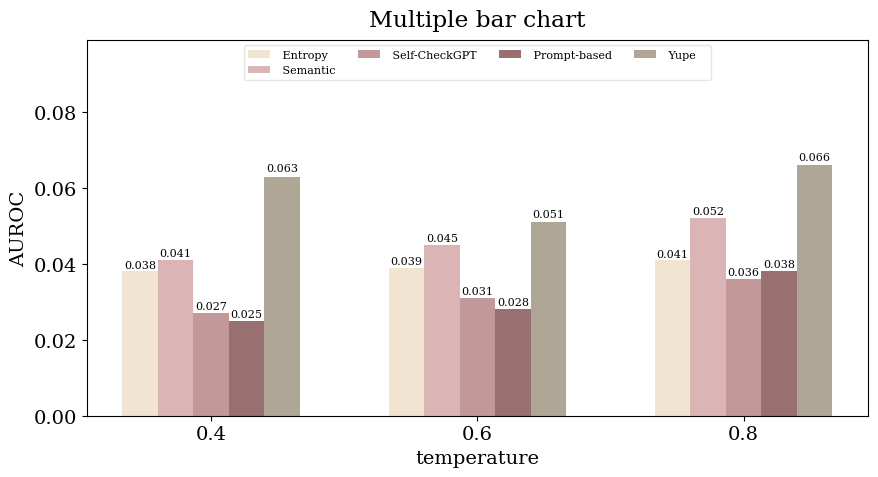

In [19]:
visualizer = Visualizer("data/temp2.csv", xaxis=True, CI=False) 
visualizer.mutiple_bar(grid=False, xlabel="temperature", show_value=True, filesave="figure/4215.png", ylabel="AUROC", title="Multiple bar chart")

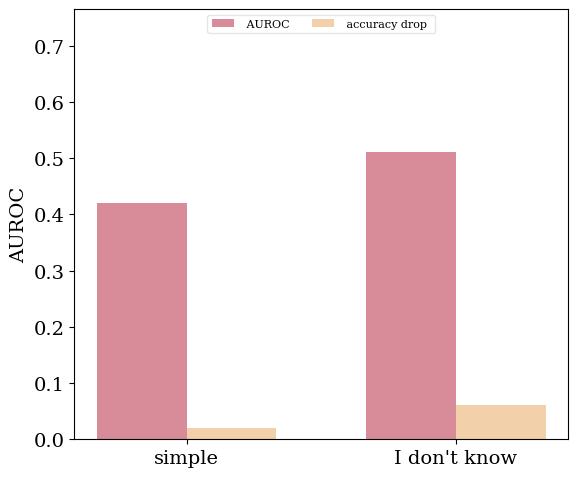

In [5]:
visualizer = Visualizer("new_data/aug.csv", xaxis=True, CI=False, style={"bar": "bar3"}) 
visualizer.mutiple_bar(grid=False, ylabel="AUROC", title="")

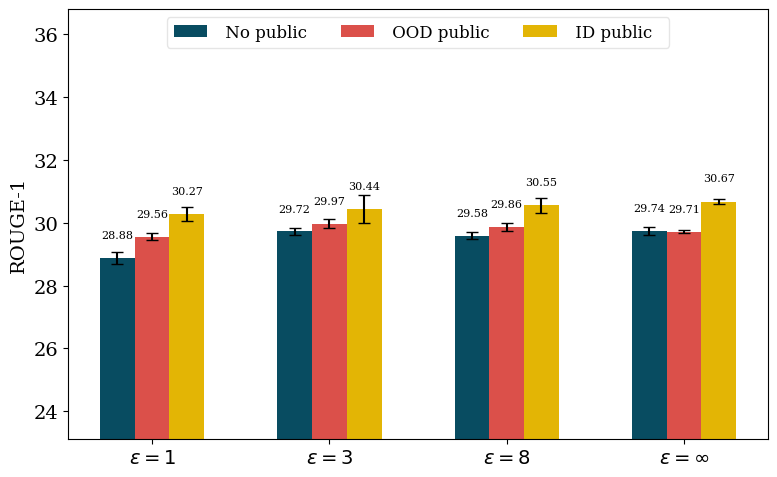

In [13]:
import matplotlib as plt 
plt.rcParams['font.family'] = 'Arial'
visualizer = Visualizer("new_data/ood_rouge.csv", xaxis=True, CI=True, style={"bar": "bar4"}) 
visualizer.mutiple_bar(grid=False, ylabel="ROUGE-1", show_value=True , margin_ratio=1.7, title="", filesave="OOD_ROUGE.png")

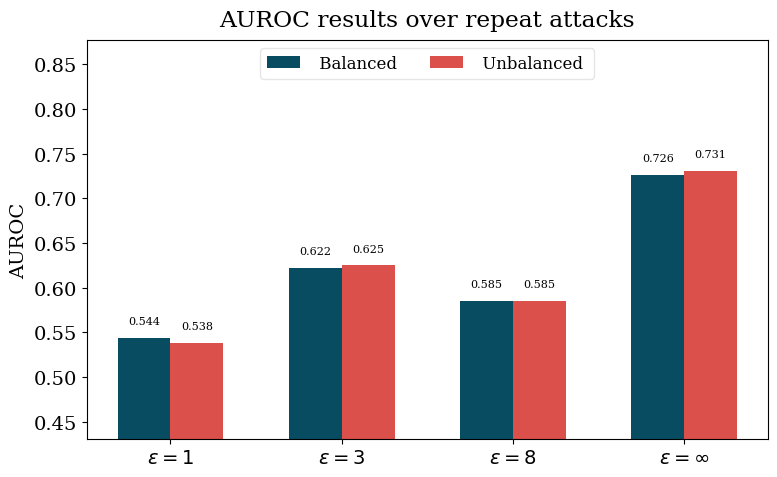

In [15]:
visualizer = Visualizer("new_data/auroc.csv", xaxis=True, CI=False, style={"bar": "bar4"}) 
visualizer.mutiple_bar(grid=False, ylabel="AUROC", show_value=True , margin_ratio=1.62, title="AUROC results over repeat attacks", filesave="MIA.png")

# Array

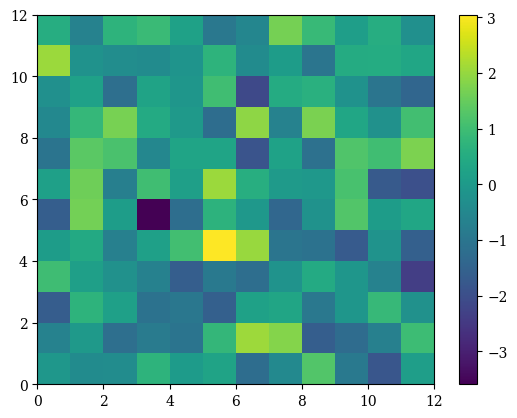

In [21]:
matrix = np.random.standard_normal(size=(12,12))
Visualizer.display_array(matrix, cmap="viridis")

# Scatter 

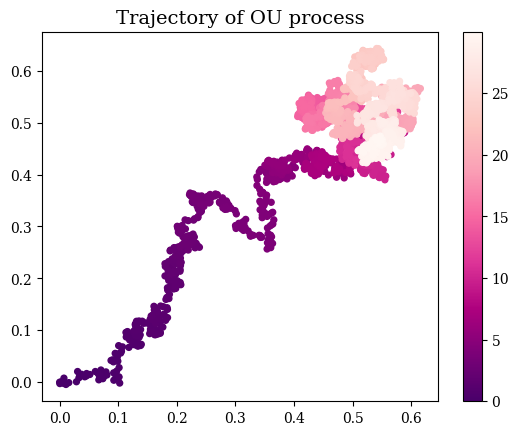

In [22]:
from ou_noise import ou 
t = np.arange(0, 30, 0.01)
x = ou.path(0.0, t, .4, 0.5, 0.05)
y = ou.path(0.0, t , .4, 0.5, 0.05)
Visualizer.scatter(x,y,timestamp=t, title="Trajectory of OU process")